In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix

### Data Collection and preprocessing

In [108]:
parkn_data = pd.read_csv('D:/Minor Project/parkinson disease/parkinsons.csv')
parkn_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [109]:
parkn_data.shape

(195, 24)

In [110]:
parkn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [111]:
parkn_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [112]:
parkn_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [113]:
parkn_data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

#### Check correlation between columns

In [114]:
new_data = parkn_data.drop(columns=['name'],axis=1)
print(new_data.corr()['status'].abs().sort_values(ascending=False))

status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: status, dtype: float64


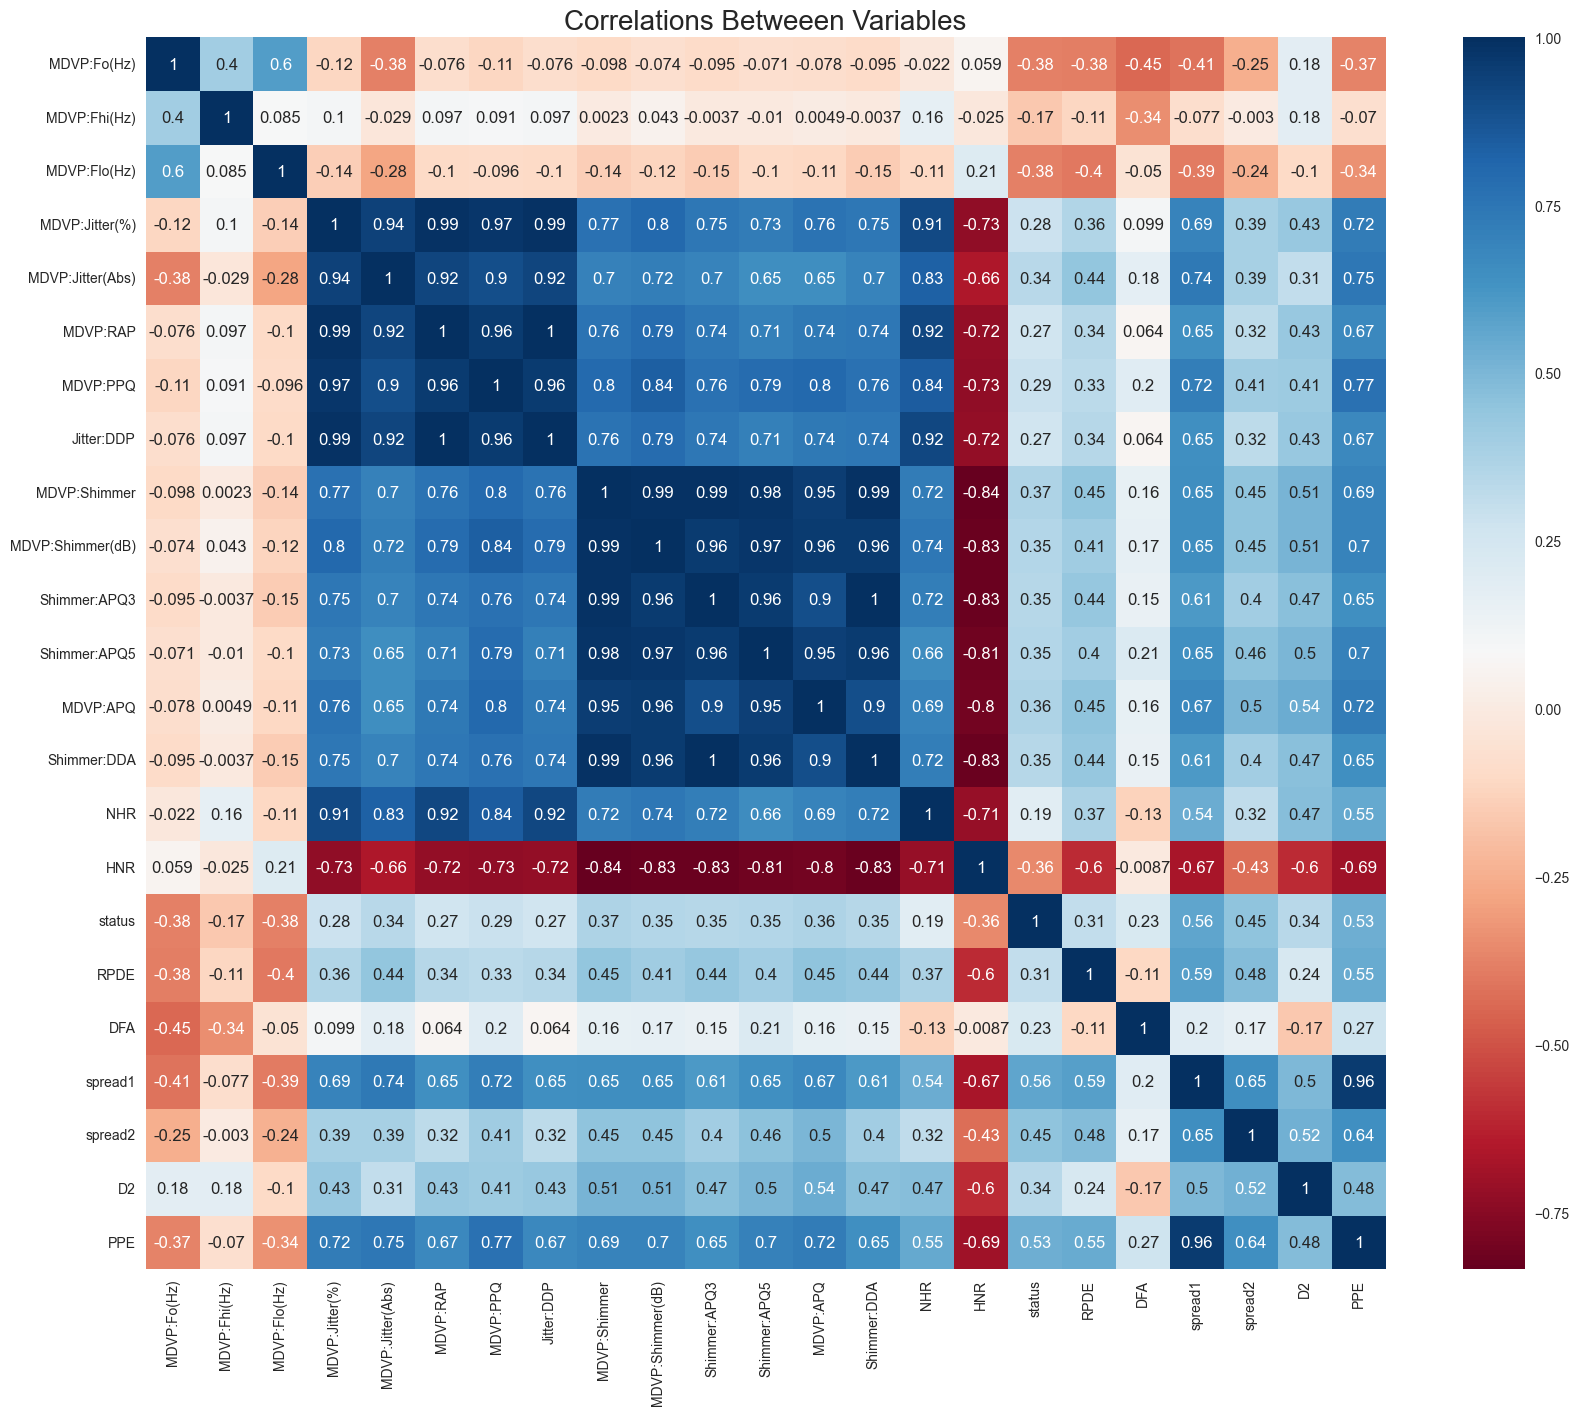

In [115]:
# Heatmap
import matplotlib.pyplot  as plt
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(new_data.corr(), annot=True, cmap="RdBu")
plt.title("Correlations Betweeen Variables", size=20)
plt.show()

###### It can be seen that many of the features are moderately correlated with the target, 'status'. The features are therefore important factors influencing the target.

### Set up features and target

In [116]:
X = parkn_data.drop(columns=['status','name'],axis=1)
Y = parkn_data['status']


#### Normalize Data

In [117]:
from sklearn.preprocessing import MinMaxScaler
#Scale the features to between -1 and 1
scaler=MinMaxScaler((-1,1))
X=scaler.fit_transform(X)
print(f"Normlized Features its max : \n{X.max()} \n\nits min : \n{new_data.min()}" )

Normlized Features its max : 
1.0000000000000002 

its min : 
MDVP:Fo(Hz)          88.333000
MDVP:Fhi(Hz)        102.145000
MDVP:Flo(Hz)         65.476000
MDVP:Jitter(%)        0.001680
MDVP:Jitter(Abs)      0.000007
MDVP:RAP              0.000680
MDVP:PPQ              0.000920
Jitter:DDP            0.002040
MDVP:Shimmer          0.009540
MDVP:Shimmer(dB)      0.085000
Shimmer:APQ3          0.004550
Shimmer:APQ5          0.005700
MDVP:APQ              0.007190
Shimmer:DDA           0.013640
NHR                   0.000650
HNR                   8.441000
status                0.000000
RPDE                  0.256570
DFA                   0.574282
spread1              -7.964984
spread2               0.006274
D2                    1.423287
PPE                   0.044539
dtype: float64


### Splitting test and train data

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

### Modelling

#### 1. Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10000)

##### Evaluate the model

In [120]:
#Accuracy on training data
pred_train_rf = rf.predict(X_train)
rf_train_accuracy = round(accuracy_score(pred_train_rf,Y_train)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_train_accuracy)+" %")

#Accuracy on test data
rf_test_pred = rf.predict(X_test)
rf_test_accuracy = round(accuracy_score(rf_test_pred,Y_test)*100,2)
print("The accuracy score achieved using the Random Forest model is: "+str(rf_test_accuracy)+" %")

The accuracy score achieved using the Random Forest model is: 100.0 %
The accuracy score achieved using the Random Forest model is: 94.87 %


#### Confusion matrix

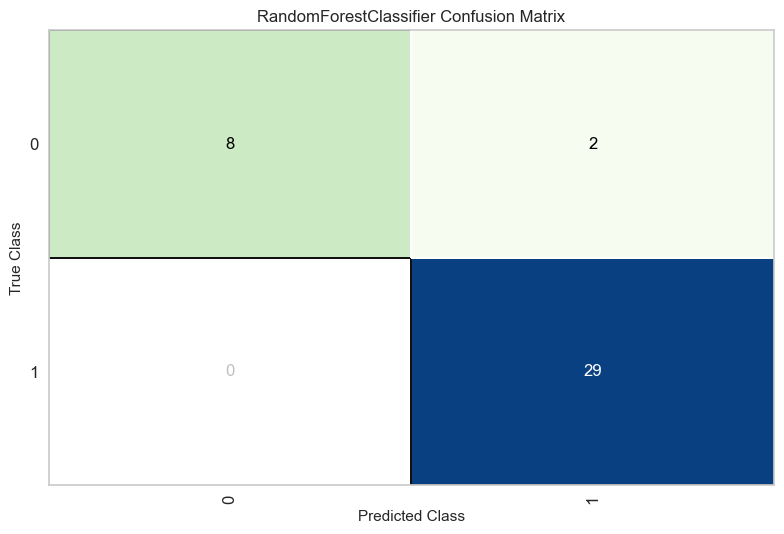

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [121]:
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

rf_cm = ConfusionMatrix(rf, cmap='GnBu')
rf_cm.fit(X_train, Y_train)
rf_cm.score(X_test, Y_test)
rf_cm.show()

In [122]:
print(classification_report(Y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39



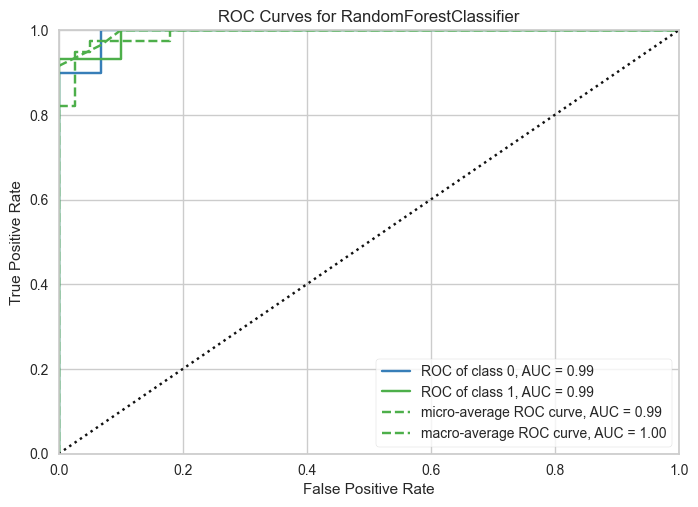

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [123]:
visualizer = ROCAUC(rf)
set_palette('bold')
visualizer.fit(X_train, Y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, Y_test)        # Evaluate the model on the test data
visualizer.show() 

#### Logistic Regression

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

##### Evaluate model

In [125]:
#Accuracy on training data
lg_train_prediction = model.predict(X_train)
lg_training_data_accuracy = round(accuracy_score(lg_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_training_data_accuracy)+" %")

#Accuracy on test data
lg_test_prediction = model.predict(X_test)
lg_test_data_accuracy = round(accuracy_score(lg_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Logistic Regression model is: "+str(lg_test_data_accuracy)+" %")

The accuracy score achieved using the Logistic Regression model is: 85.9 %
The accuracy score achieved using the Logistic Regression model is: 84.62 %


In [126]:
print(confusion_matrix(Y_test, lg_test_prediction))

[[ 6  4]
 [ 2 27]]


In [127]:
print(classification_report(Y_test, lg_test_prediction))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39



#### Support Vector Machine

In [128]:
from sklearn.svm import SVC
svm = SVC(probability=True,C=1,gamma=0.1)
svm.fit(X_train,Y_train)

SVC(C=1, gamma=0.1, probability=True)

In [129]:
#Accuracy on training data
svc_train_prediction = svm.predict(X_train)
svc_training_data_accuracy = round(accuracy_score(svc_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_training_data_accuracy)+" %")

#Accuracy on test data
svc_test_prediction = svm.predict(X_test)
svc_test_data_accuracy = round(accuracy_score(svc_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the SVM model is: "+str(svc_test_data_accuracy)+" %")

The accuracy score achieved using the SVM model is: 87.18 %
The accuracy score achieved using the SVM model is: 87.18 %


In [130]:
print(confusion_matrix(Y_test, svc_test_prediction))
print(classification_report(Y_test, svc_test_prediction))

[[ 5  5]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



#### KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [132]:
#Accuracy on training data
knn_train_prediction = knn.predict(X_train)
knn_training_data_accuracy = round(accuracy_score(knn_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_training_data_accuracy)+" %")

#Accuracy on test data
knn_test_prediction = svm.predict(X_test)
knn_test_data_accuracy = round(accuracy_score(knn_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the KNN model is: "+str(knn_test_data_accuracy)+" %")

The accuracy score achieved using the KNN model is: 95.51 %
The accuracy score achieved using the KNN model is: 87.18 %


In [133]:
print(confusion_matrix(Y_test, knn_test_prediction))
print(classification_report(Y_test, knn_test_prediction))

[[ 5  5]
 [ 0 29]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.85      1.00      0.92        29

    accuracy                           0.87        39
   macro avg       0.93      0.75      0.79        39
weighted avg       0.89      0.87      0.86        39



#### Naive Bayes Model

In [134]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [135]:
#Accuracy on training data
nbm_train_prediction = nb.predict(X_train)
nbm_training_data_accuracy = round(accuracy_score(nbm_train_prediction,Y_train)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_training_data_accuracy)+" %")

#Accuracy on test data
nbm_test_prediction = nb.predict(X_test)
nbm_test_data_accuracy = round(accuracy_score(nbm_test_prediction,Y_test)*100,2)
print("The accuracy score achieved using the Naive Bayes model is: "+str(nbm_test_data_accuracy)+" %")

The accuracy score achieved using the Naive Bayes model is: 71.15 %
The accuracy score achieved using the Naive Bayes model is: 66.67 %


In [136]:
print(confusion_matrix(Y_test, nbm_test_prediction))
print(classification_report(Y_test, nbm_test_prediction))

[[ 9  1]
 [12 17]]
              precision    recall  f1-score   support

           0       0.43      0.90      0.58        10
           1       0.94      0.59      0.72        29

    accuracy                           0.67        39
   macro avg       0.69      0.74      0.65        39
weighted avg       0.81      0.67      0.69        39



#### Comparison of Models Accuracy

In [137]:
scores = [lg_test_data_accuracy,nbm_test_data_accuracy,svc_test_data_accuracy,knn_test_data_accuracy,rf_test_accuracy]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Random Forest"]    
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 84.62 %
The accuracy score achieved using Naive Bayes is: 66.67 %
The accuracy score achieved using Support Vector Machine is: 87.18 %
The accuracy score achieved using K-Nearest Neighbors is: 87.18 %
The accuracy score achieved using Random Forest is: 94.87 %


Text(0, 0.5, 'Accuracy score')

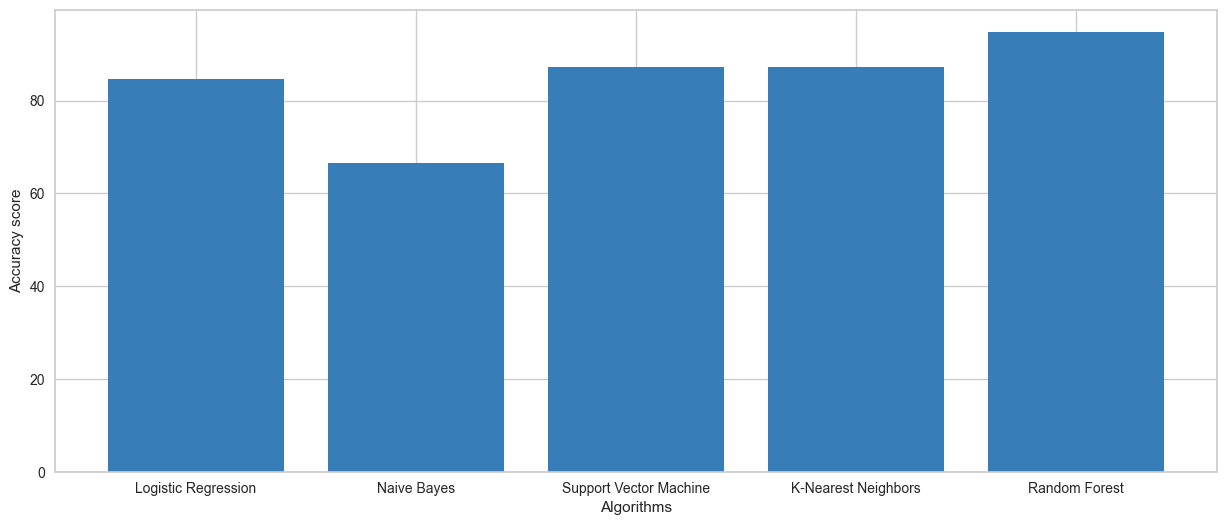

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (15,6))
plt.bar(algorithms,scores)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

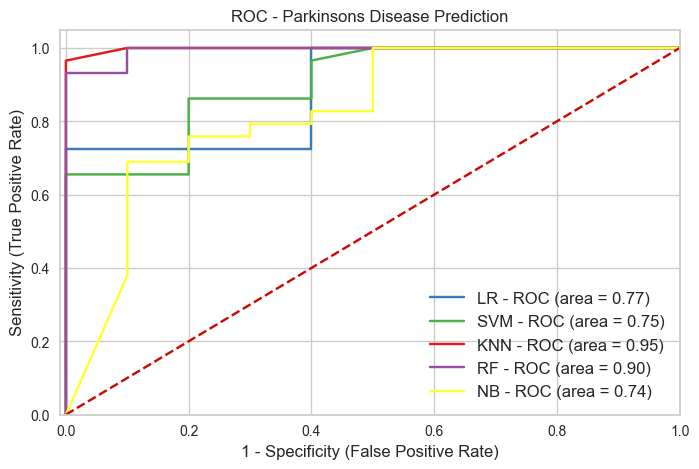

In [139]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': model,
},

{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rf,
},
{
   'label': 'NB',
   'model': nb,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Parkinson''s Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
#plt.savefig("outputs/roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

#### Predictive Model using Random Forest Classifier

In [140]:
input_data = (197.076,206.896,192.055,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.097,0.00563,0.0068,0.00802,0.01689,0.00339,26.775,0.422229,0.741367,-7.3483,0.177551,1.743867,0.085569
)
#change input data to numpy array
input_array = np.array(input_data).reshape((1, -1))
prediction = rf.predict(input_array)
print("Predicted value: ", prediction)

if prediction[0]==0:
    print("Person doesn't have parkinson's disease")
else:
    print("Person has parkinson's disease")

Predicted value:  [1]
Person has parkinson's disease


In [141]:
import pickle
file_name = 'parkinson_disease_model.sav'
pickle.dump(model,open(file_name,'wb'))